## Installing Dependencies

In [1]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.0 MB/s eta 0:00:00 MB/s eta 0:00:01


## Import Dependencies

In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [47]:
data = fetch_california_housing()

In [49]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## Loading the dataset to a Pandas Dataframe

In [55]:
dataframe = pd.DataFrame(data.data,columns=data.feature_names)

In [56]:
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Add the target price column to the dataframe

In [59]:
dataframe['price'] = data.target

In [60]:
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Check for Missing Values

In [62]:
dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

## Statistical Measures of the dataset

In [63]:
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Exploratory Data Analysis

In [65]:
correlation = dataframe.corr()
correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

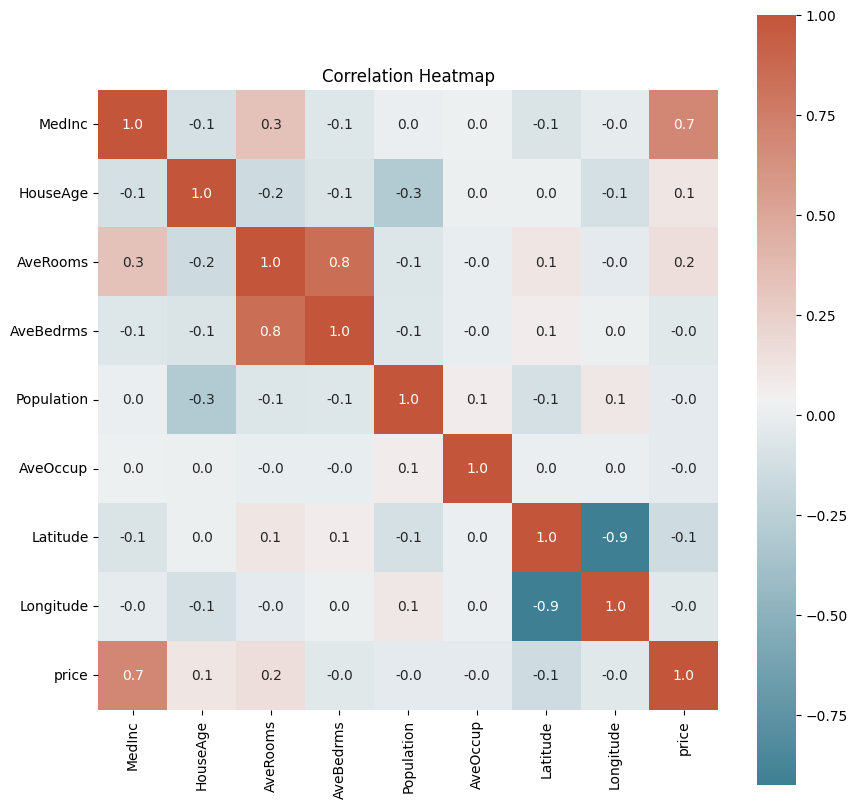

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10},cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Heatmap')

Based on the provided correlation data and the above heatmap,
I can draw the following conclusions:
- MedInc and Price: There is a strong positive correlation (0.688075) between the median income (MedInc) and housing prices. This suggests that areas with higher median incomes tend to have higher housing prices.
- AveRooms and AveBedrms: The variables AveRooms (average number of rooms) and AveBedrms (average number of bedrooms) have a very high positive correlation (0.847621). This is expected, as houses with more rooms typically have more bedrooms.
- Latitude and Longitude: Latitude and Longitude have a strong negative correlation (-0.924664), which is expected since they represent different dimensions of geographic coordinates.
- Housing Age and Population: There is a moderate negative correlation (-0.296244) between the housing age (HouseAge) and the population. This could indicate that areas with older housing tend to have lower population densities, or vice versa.
- Low correlations: Some variables, such as AveOccup (average occupancy), have very low correlations with other variables, suggesting that they may not be strongly related to housing prices or other factors in this dataset.
- Positive vs. Negative Correlations: The heatmap shows a mix of positive and negative correlations between different variables, indicating that some variables increase together (e.g., MedInc and Price), while others tend to move in opposite directions (e.g., HouseAge and Population).

### Let`s use a dendogram to visualize the data

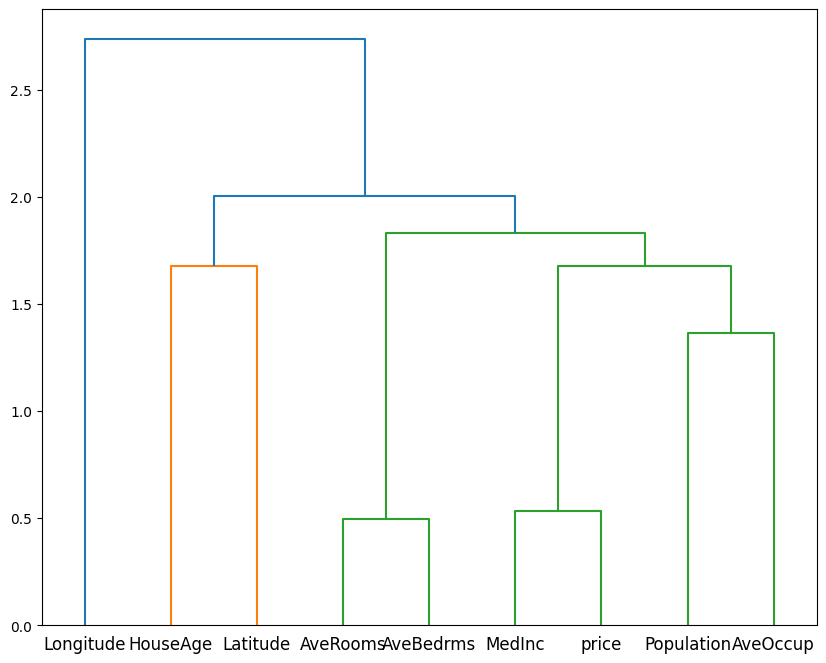

In [106]:
import scipy.cluster.hierarchy as sch
# Perform hierarchical clustering
cluster = sch.linkage(correlation, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
sch.dendrogram(cluster, labels=correlation.columns)
plt.show()

From the dendrogram, we can draw the following conclusions:

- The variables "AveRooms" and "AveBedrms" have the highest correlation and are clustered together at the lowest distance, indicating a very strong positive correlation between them.
- The variables "Latitude" and "Longitude" are also clustered together at a relatively low distance, suggesting a strong negative correlation between them, as expected for geographic coordinates.
- The variable "MedInc" (median income) appears to be moderately correlated with the "Price" variable, as they are clustered together at a moderate distance.
- The variables "HouseAge," "Population," and "AveOccup" seem to have relatively low correlations with the other variables, as they are clustered together at a larger distance from the main clusters.

Overall, the dendrogram confirms the correlation patterns observed in the previous heatmap and scatter plot matrix, providing a hierarchical representation of the variable correlations.

In [111]:
X = dataframe.drop(['price'], axis=1)
y = dataframe['price']

## Split the Data

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train the Model

In [116]:
model = XGBRegressor()

In [117]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Predictions

In [120]:
predictions = model.predict(X_test)
predictions

array([0.61055505, 0.5508025 , 4.765771  , ..., 2.8856103 , 1.3401958 ,
       2.1619294 ], dtype=float32)

Now we plot the above predicted values and their labels

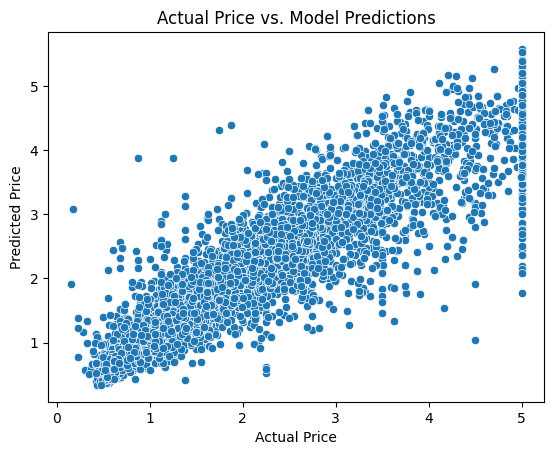

In [129]:
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Model Predictions')
plt.show()

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [127]:
print('Mean absolute Error: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: ', math.sqrt(mean_squared_error(y_test, predictions)))
print('R Squared Error: ', r2_score(y_test, predictions))

Mean absolute Error:  0.30724618978712903
Mean Squared Error:  0.21182273803266358
Root Mean Squared Error:  0.4602420428781616
R Squared Error:  0.8386161788339781
